In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml
import scipy
import os 

import MopsAnalysis
import MopsReader
import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters

% matplotlib inline

In [2]:
dataLocation = "/Users/joachim/repos/neosim/unittest/testData/testsources.db"
subsampleLocation = "/Users/joachim/repos/neosim/unittest/testData/test/"

In [3]:
con = sql.connect(dataLocation)

In [4]:
full = pd.read_sql_query("""
SELECT * FROM testsources
""", con)

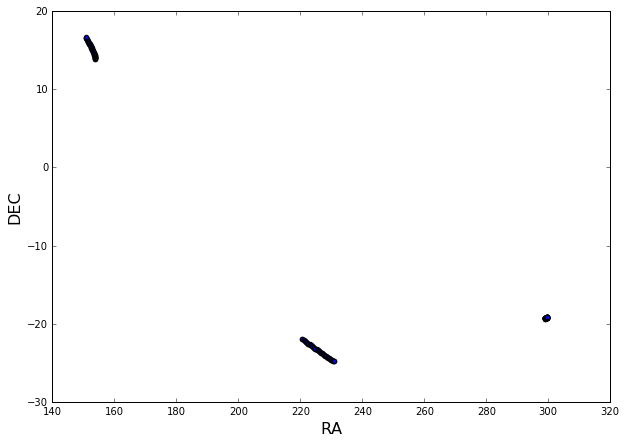

In [5]:
MopsPlotter.plotDataframe(full)

In [6]:
ssmids = pd.read_sql_query("""
SELECT DISTINCT ssmid FROM testsources
""", con)

In [7]:
len(ssmids['ssmid'])

3

In [8]:
obj_num = 3

In [9]:
num_ssm = random.sample(ssmids['ssmid'], obj_num)
sample = ""
for i in num_ssm:
    sample += str(i) + ', '
    
sample = '(' + sample[0:-2] + ')'

In [10]:
objs = pd.read_sql_query("""
SELECT * FROM testsources
WHERE ssmid IN %s
""" % (sample), con, index_col='diaid')

In [11]:
objs

,obshistid,ssmid,ra,dec,mjd,mag,snr
diaid,,,,,,,
0,0,1,220.643549,-21.965527,59580.16,15.181889,5
1,1,1,220.659667,-21.970416,59580.20,15.181976,5
2,2,1,221.042042,-22.085481,59581.16,15.184020,5
3,3,1,221.058056,-22.090310,59581.20,15.184099,5
4,4,1,221.437935,-22.203902,59582.16,15.185958,5
5,5,1,221.453842,-22.208670,59582.20,15.186030,5
6,6,1,221.831176,-22.320788,59583.16,15.187702,5
7,7,1,221.846974,-22.325496,59583.20,15.187766,5
8,8,1,222.221714,-22.436138,59584.16,15.189252,5


In [12]:
subsampleData = subsampleLocation + "subsampledata.txt"

In [13]:
objs.to_csv(subsampleData, sep=" ", header=False, index='diaid')

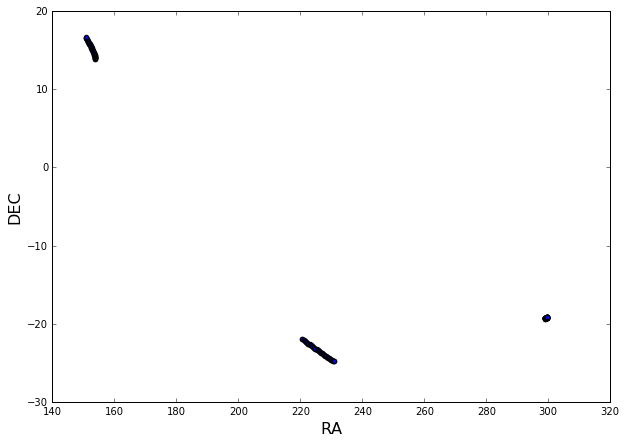

In [14]:
MopsPlotter.plotDataframe(objs)

In [15]:
! rm -rf {subsampleLocation}/nightly/
! rm -rf {subsampleLocation}/obshist/
! mkdir {subsampleLocation}/nightly
! mkdir {subsampleLocation}/obshist

In [16]:
! python $MOPS_DIR/bin/splitByNight.py /Users/joachim/repos/neosim/unittest/testData/test/subsampledata.txt /Users/joachim/repos/neosim/unittest/testData/test/nightly/ /Users/joachim/repos/neosim/unittest/testData/test/obshist/

In [17]:
! rm -rf {subsampleLocation}/subsampleRun

In [18]:
! python runMops.py {subsampleLocation}/nightly {subsampleLocation}/subsampleRun

------- Run MOPS -------
Running LSST's Moving Object Pipeline

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets ----
	Remove subsets:                           False
	Keep only longest:                        False
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	 Detection error threshold:               0.0004
	 Maximum right ascension accel

In [19]:
parameters = MopsParameters.fromYaml(subsampleLocation + "subsampleRun/parameters.yaml")
tracker = MopsTracker.fromYaml(subsampleLocation + "subsampleRun/tracker.yaml")

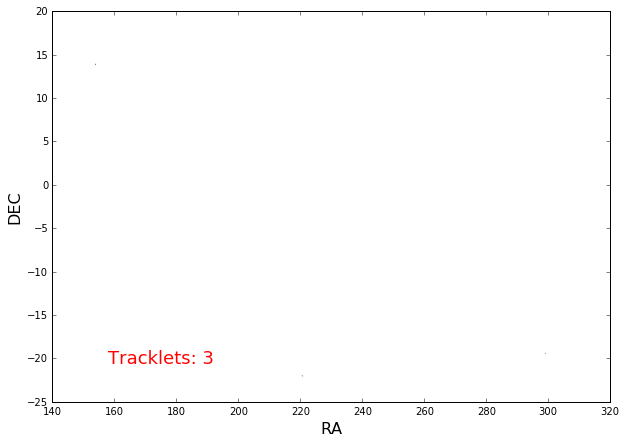

In [20]:
MopsPlotter.plotTracklets(tracker.diasources[:1], tracker.tracklets[:1])

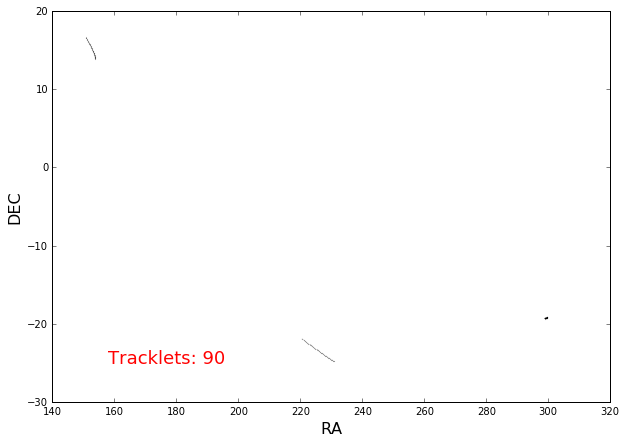

In [21]:
MopsPlotter.plotTracklets(tracker.diasources, tracker.collapsedTrackletsById)

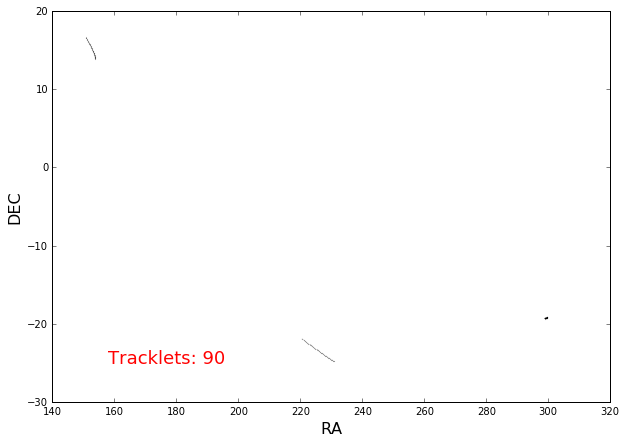

In [22]:
MopsPlotter.plotTracklets(tracker.diasources, tracker.purifiedTrackletsById)

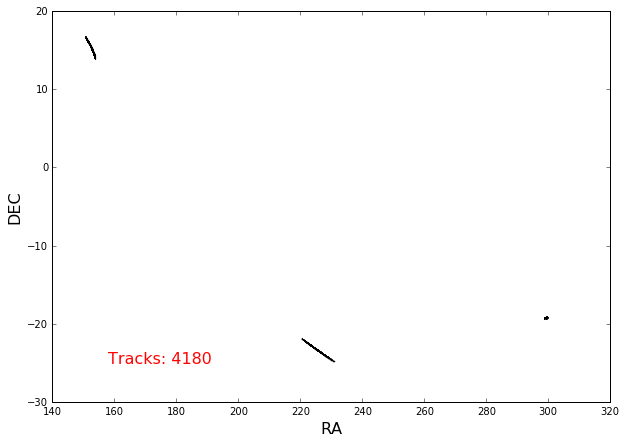

In [23]:
MopsPlotter.plotTracks(tracker.dets, tracker.tracks)

In [24]:
import MopsAnalysis

In [25]:
analysis = MopsAnalysis.runAnalysis(parameters, tracker)

In [26]:
analysis.analyze()

Starting analysis for 59580.tracklets at Mon Feb  8 20:30:21 2016
Writing results to /Users/joachim/repos/neosim/unittest/testData/test/subsampleRun/tracklets/59580.tracklets.results
Finished analysis for 59580.tracklets at Mon Feb  8 20:30:21 2016

Starting analysis for 59581.tracklets at Mon Feb  8 20:30:21 2016
Writing results to /Users/joachim/repos/neosim/unittest/testData/test/subsampleRun/tracklets/59581.tracklets.results
Finished analysis for 59581.tracklets at Mon Feb  8 20:30:21 2016

Starting analysis for 59582.tracklets at Mon Feb  8 20:30:21 2016
Writing results to /Users/joachim/repos/neosim/unittest/testData/test/subsampleRun/tracklets/59582.tracklets.results
Finished analysis for 59582.tracklets at Mon Feb  8 20:30:21 2016

Starting analysis for 59583.tracklets at Mon Feb  8 20:30:21 2016
Writing results to /Users/joachim/repos/neosim/unittest/testData/test/subsampleRun/tracklets/59583.tracklets.results
Finished analysis for 59583.tracklets at Mon Feb  8 20:30:21 2016



MopsAnalysis.py:553: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if ssmids == None:


In [27]:
analysis.ssmidsOfInterestObjects[1].tracks.ra

AttributeError: 'dict' object has no attribute 'ra'

In [ ]:
analysis.totalTracklets

In [ ]:
analysis.totalCollapsedTracklets

In [ ]:
analysis.subsetTracks

In [ ]:
analysis.longestTracks

In [ ]:
analysis.ssmidsOfInterest

In [ ]:
analysis.ssmidsOfInterestObjects[2].tracks

In [ ]:
testObject = analysis.ssmidsOfInterestObjects[2]

In [ ]:
testObject.tracks['59581-59596'][0].diasources[0]

In [ ]:
testObject.tracks['59593-59608'][2].isSubset

In [ ]:
testObject.tracks['59593-59608'][2].isTrue

In [ ]:
def plotTrackObj(ax, track):
    ras = []
    decs = []
    for diasource in track.diasources:
        ras.append(diasource.ra)
        decs.append(diasource.dec)
        
    ax.plot(ras, decs)

In [ ]:
fig, ax = plt.subplots(1,1)
for track in testObject.tracks['59593-59608']:
    plotTrackObj(ax, track)

In [ ]:
def makeContiguous(angles):
    a0 = angles[0]
    output = [a0]
    for angle in angles[1:]:
        while abs(angle - a0) > 180:
            if angle > a0:
                angle -= 360.
            else:
                angle += 360.
        output.append(angle)
    return output

def convertToStandardDegrees(angle):
    while angle > 360.:
        angle -= 360.
    while angle < 0.:
        angle += 360.
    return angle

def calcDegToRad(angle):
    return angle*(np.pi/180.0)

def calcRadToDeg(angle):
    return angle*(180.0/np.pi)

def calcAngularDistance(a, b):
    while abs(a - b) > 180:
        if a > b:
            b += 360.
        else:
            a += 360.
    return a - b

def calcGreatCircleDistance(ra0, dec0, ra1, dec1):
    ra_dist = calcAngularDistance(ra0, ra1);
    dec_dist = calcAngularDistance(dec0, dec1);    
    # Convert all factors to radians
    ra_dist = calcDegToRad(convertToStandardDegrees(ra_dist));
    dec_dist = calcDegToRad(convertToStandardDegrees(dec_dist));
    dec0 = calcDegToRad(convertToStandardDegrees(dec0));
    dec1 = calcDegToRad(convertToStandardDegrees(dec1));
    r = 2*np.arcsin(np.sqrt((np.sin(dec_dist/2.))**2 + np.cos(dec0)*np.cos(dec1)*(np.sin(ra_dist/2))**2));
    # Back to degrees
    return calcRadToDeg(r);
    
def calcRMS(diasources):
    t0 = min(map(lambda x: x.mjd, diasources))
    ras = []
    decs = []
    mjds = []
    for diasource in diasources:
        ras.append(diasource.ra)
        decs.append(diasource.dec)
        mjds.append(diasource.mjd - t0)
    ras = makeContiguous(ras)
    decs = makeContiguous(decs)
    ras = np.array(ras)
    decs = np.array(decs)
    mjds = np.array(mjds)

    raFunc, raRes, rank, svd, rcond = np.polyfit(mjds, ras, 2, full=True)
    decFunc, decRes, rank, svd, rcond = np.polyfit(mjds, decs, 2, full=True)
    raFunc = np.poly1d(raFunc)
    decFunc = np.poly1d(decFunc)

    #now get the euclidean distance between predicted and observed for each point
    netSqDist = 0.0
    dists = []
    for i in range(len(mjds)):
        predRa = raFunc(mjds[i])
        predDec = decFunc(mjds[i])
        dist = calcGreatCircleDistance(predRa, predDec, ras[i], decs[i])
        dists.append(dist)
        if (dist > .1):
            print "Unexpected wierdness, diasource had angular distance of %f from best-fit curve prediction" % (dist)
            print "Predicted RA, Dec were ", predRa, predDec
            print "observed RA, Dec were ", ras[i], decs[i]
            print "all RAs were ", ras
            print "all decs were ", decs
        sqDist = dist**2
        #print "got euclidean distance was ", sqDist
        netSqDist += sqDist

    rms = np.sqrt(netSqDist / len(diasources))
    if (rms > .1):
        print "RMS error was %f " % (rms)
    return rms, raRes[0], decRes[0], dists

def countFindableTrueTrackletsAndSSMIDs(dataframe, minDetections, vmax):
    findableTrueTracklets = 0
    
    possible_ssmids = dataframe.groupby("ssmid").filter(lambda x: len(x) >= minDetections)
    unique_ssmids = possible_ssmids['ssmid'].unique()
    findable_ssmids = []
    
    for unique_ssmid in unique_ssmids:
        detections = possible_ssmids[possible_ssmids["ssmid"] == unique_ssmid]
        detections.sort(columns="mjd")

        start_mjd = min(detections['mjd'])
        end_mjd = max(detections['mjd'])

        dt = end_mjd - start_mjd
        max_distance = dt*vmax

        total_distance = 0.0
        total_time = 0.0

        for det0, det1 in zip(detections.iloc[:-1].itertuples(), detections.iloc[1:].itertuples()):
            total_distance += calcGreatCircleDistance(det0[3], det0[4], det1[3], det1[4])

        if max_distance > total_distance:
             findableTrueTracklets += 1
             findable_ssmids.append(unique_ssmid)
                
    return findableTrueTracklets, findable_ssmids

In [ ]:
countFindableTrueTrackletsAndSSMIDs(objs, 2, 0.5)

In [ ]:
def countFindableTrueTracks(dataframe, minDetectionsPerNight, minNights):
    findableTracks = 0
    
    possible_ssmids = dataframe.groupby("ssmid").filter(lambda x: len(x) >= minDetectionsPerNight*minNights)
    unique_ssmids = possible_ssmids['ssmid'].unique()
    findable_ssmids = []
    
    for unique_ssmid in unique_ssmids:
        detections = possible_ssmids[possible_ssmids["ssmid"] == unique_ssmid]
        unique, counts = np.unique(detections.sort(columns="mjd")['mjd'].unique().astype(int), return_counts=True)
        if len(counts[counts >= minDetectionsPerNight]) >= minNights:
            findableTracks += 1
            findable_ssmids.append(unique_ssmid)

    return findableTracks, findable_ssmids

In [ ]:
countFindableTrueTracks(objs, 2, 3)

In [ ]:
len(objs.index)

In [ ]:
for unique_ssmid in unique_ssmids:
        detections = possible_ssmids[possible_ssmids["ssmid"] == unique_ssmid]
    

In [ ]:
detections.filter(int(detections['mjd']))

In [ ]:
int(analysis.windows[0].split('-')[1]) - int(analysis.windows[0].split('-')[0])

In [ ]:
text.astype(int)

In [ ]:
def checkWindow(window, onlyFullWindows, fullWindowSize):
    if onlyFullWindows:
        if int(window.split('-')[1]) - int(window.split('-')[0]) == fullWindowSize:
            return True
        else:
            return False
    else:
        return True
 

In [ ]:
checkWindow(analysis.windows[15], True, 15)